## Importing Modules

In [51]:
# Import Pandas 
import pandas as pd
# Import numpy 
import numpy as np
# Import Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
from pandas.core import  datetools
from statsmodels.graphics import tsaplots
from pylab import rcParams
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau

In [3]:
meat = pd.read_csv('meat.csv')

In [9]:
# Convert the date column to a datestamp type
meat['date'] = pd.to_datetime(meat['date'])

# Set the date column as the index of your DataFrame meat
meat = meat.set_index('date')

# Print the summary statistics of the DataFrame
print(meat.describe())

              beef        veal         pork  lamb_and_mutton     broilers  \
count   827.000000  827.000000   827.000000       827.000000   635.000000   
mean   1683.463362   54.198549  1211.683797        38.360701  1516.582520   
std     501.698480   39.062804   371.311802        19.624340   963.012101   
min     366.000000    8.800000   124.000000        10.900000   250.900000   
25%    1231.500000   24.000000   934.500000        23.000000   636.350000   
50%    1853.000000   40.000000  1156.000000        31.000000  1211.300000   
75%    2070.000000   79.000000  1466.000000        55.000000  2426.650000   
max    2512.000000  215.000000  2210.400000       109.000000  3383.800000   

       other_chicken      turkey  
count     143.000000  635.000000  
mean       43.033566  292.814646  
std         3.867141  162.482638  
min        32.300000   12.400000  
25%        40.200000  154.150000  
50%        43.400000  278.300000  
75%        45.650000  449.150000  
max        51.100000  585.

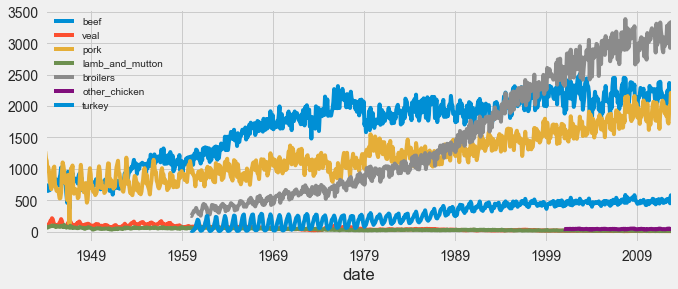

In [10]:
plt.style.use('fivethirtyeight')

ax = meat.plot(figsize=(10,4),fontsize=14)
plt.show()

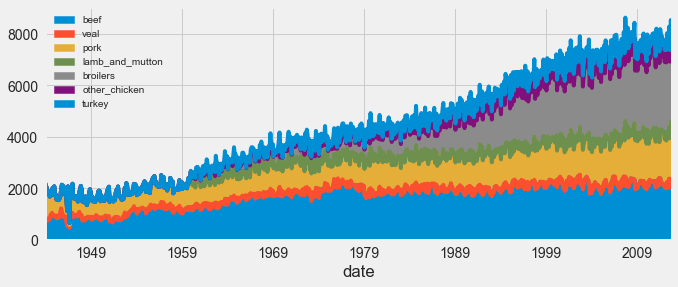

In [11]:
plt.style.use('fivethirtyeight')

ax = meat.plot.area(figsize=(10,4),fontsize=14)
plt.show()

### Define the color palette of your plots

When visualizing multiple time series, it can be difficult to differentiate between various colors in the default color scheme.

To remedy this, you can define each color manually, but this may be time-consuming. Fortunately, it is possible to leverage the colormap argument to .plot() to automatically assign specific color palettes with varying contrasts.

You can either provide a matplotlib colormap as an input to this parameter, or provide one of the default strings that is available in the colormap() function available in matplotlib

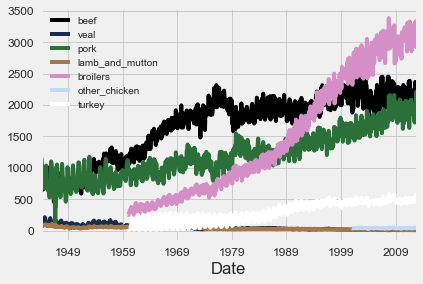

In [16]:
# Plot time series dataset using the cubehelix color palette
ax = meat.plot(colormap='cubehelix', fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=10)

# Show plot
plt.show()

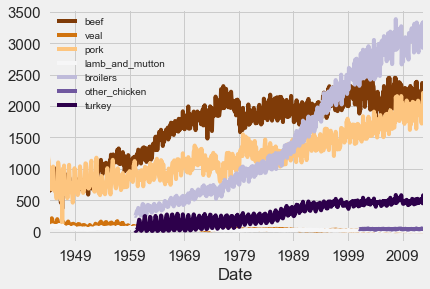

In [18]:
# Plot time series dataset using the PuOr color palette
ax = meat.plot(colormap='PuOr', fontsize=15)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=10)

# Show plot
plt.show()

### Add summary statistics to your time series plot

It is possible to visualize time series plots and numerical summaries on one single graph by using the pandas API to matplotlib along with the table method:

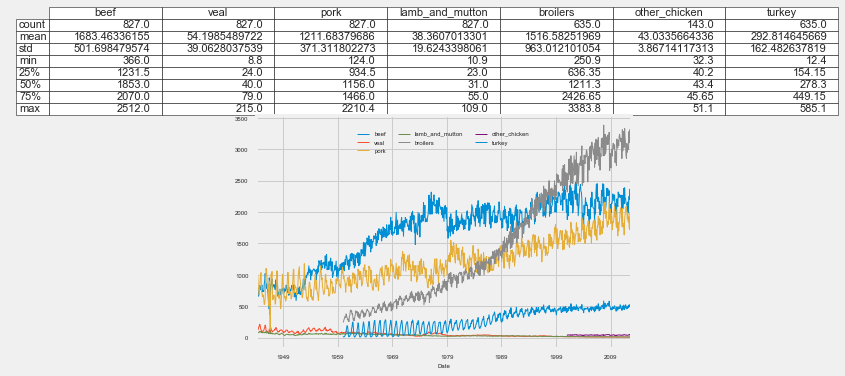

In [40]:

# Plot the meat data
ax = meat.plot(fontsize=6, linewidth=1)

# Add x-axis labels
ax.set_xlabel('Date', fontsize=6)

meat_summary = meat.describe()
# Add summary table information to the plot
ax.table(cellText=meat_summary.values, 
         colWidths=[0.3]*len(meat.columns), 
         rowLabels=meat_summary.index, 
         colLabels=meat_summary.columns, 
         loc='top')

# Specify the fontsize and location of your legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3, fontsize=6)

# Show plot
plt.show()

### Plot your time series on individual plots

It can be beneficial to plot individual time series on separate graphs as this may improve clarity and provide more context around each time series in your DataFrame.

It is possible to create a "grid" of individual graphs by "faceting" each time series by setting the subplots argument to True. In addition, the arguments that can be added are:

layout: specifies the number of rows x columns to use.
sharex and sharey: specifies whether the x-axis and y-axis values should be shared between your plots.

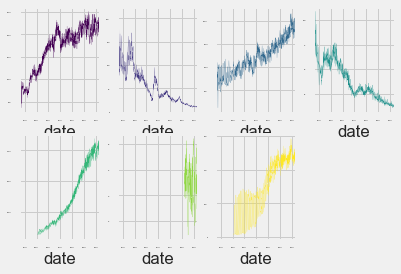

In [50]:
# Create a facetted graph with 2 rows and 4 columns
meat.plot(subplots=True, 
          layout=(2, 4), 
          sharex=False, 
          sharey=False, 
          colormap='viridis', 
          fontsize=2, 
          legend=False, 
          linewidth=0.2)
          
plt.show()

### Compute correlations between time series

The correlation coefficient can be used to determine how multiple variables (or a group of time series) are associated with one another. The result is a correlation matrix that describes the correlation between time series. Note that the diagonal values in a correlation matrix will always be 1, since a time series will always be perfectly correlated with itself.

Correlation coefficients can be computed with the pearson, kendall and spearman methods. A full discussion of these different methods is outside the scope of this course, but the pearson method should be used when relationships between your variables are thought to be linear, while the kendall and spearman methods should be used when relationships between your variables are thought to be non-linear.

In [52]:
# Print the correlation matrix between the beef and pork columns using the spearman method
print(meat[['beef', 'pork']].corr(method='spearman'))

# Print the correlation between beef and pork columns
print(0.827587)

          beef      pork
beef  1.000000  0.827587
pork  0.827587  1.000000
0.827587


In [53]:
# Print the correlation matrix between the pork, veal and turkey columns using the pearson method
print(meat[['pork', 'veal', 'turkey']].corr(method='pearson'))

# Print the correlation between veal and pork columns
print(-0.808834)

# Print the correlation between veal and turkey columns
print(-0.768366)

# Print the correlation between pork and turkey columns
print(0.835215)

            pork      veal    turkey
pork    1.000000 -0.808834  0.835215
veal   -0.808834  1.000000 -0.768366
turkey  0.835215 -0.768366  1.000000
-0.808834
-0.768366
0.835215


### Visualize correlation matrices

The correlation matrix generated in the previous exercise can be plotted using a heatmap. To do so, you can leverage the heatmap() function from the seaborn library which contains several arguments to tailor the look of your heatmap.

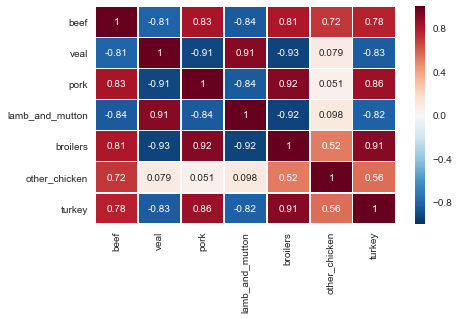

In [54]:
# Get correlation matrix of the meat DataFrame
corr_meat = meat.corr(method='spearman')

# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(corr_meat,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

### Clustered heatmaps

Heatmaps are extremely useful to visualize a correlation matrix, but clustermaps are better. A Clustermap allows to uncover structure in a correlation matrix by producing a hierarchically-clustered heatmap:


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


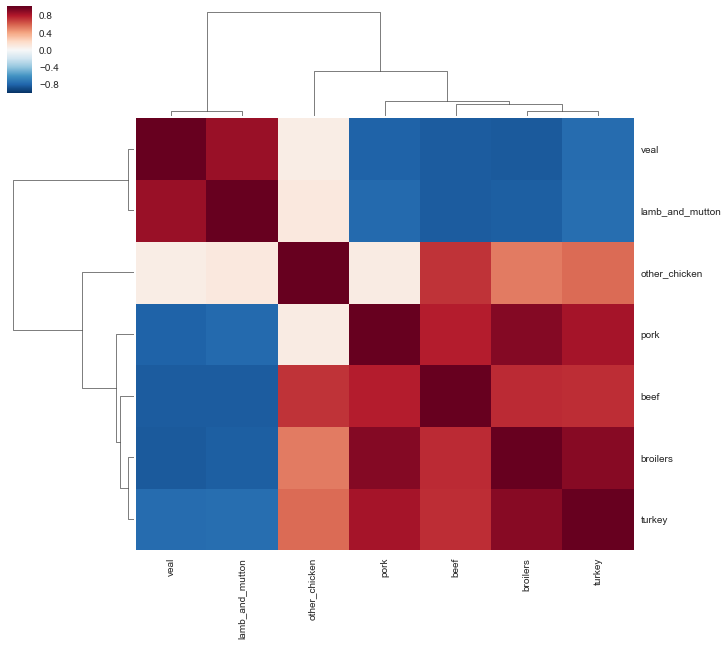

In [55]:
# Get correlation matrix of the meat DataFrame
corr_meat = meat.corr(method='pearson')

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_meat,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()